##Regression analysis
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the
**'outcome variable'**) ; nd one or more independent variables (often called **'predictors', 'covariates', or 'features'**).

### Summary

1/Architecture of a neural network regression model

2/ Input shapes and output shapes of a regression model (features and labels)

3/ Creating custom data to view and fit

4/ Steps in modelling

5/ Creating a model, compiling a model, fitting a model, evaluating a model

6/ Different evaluation methods

7/ Saving and loading models

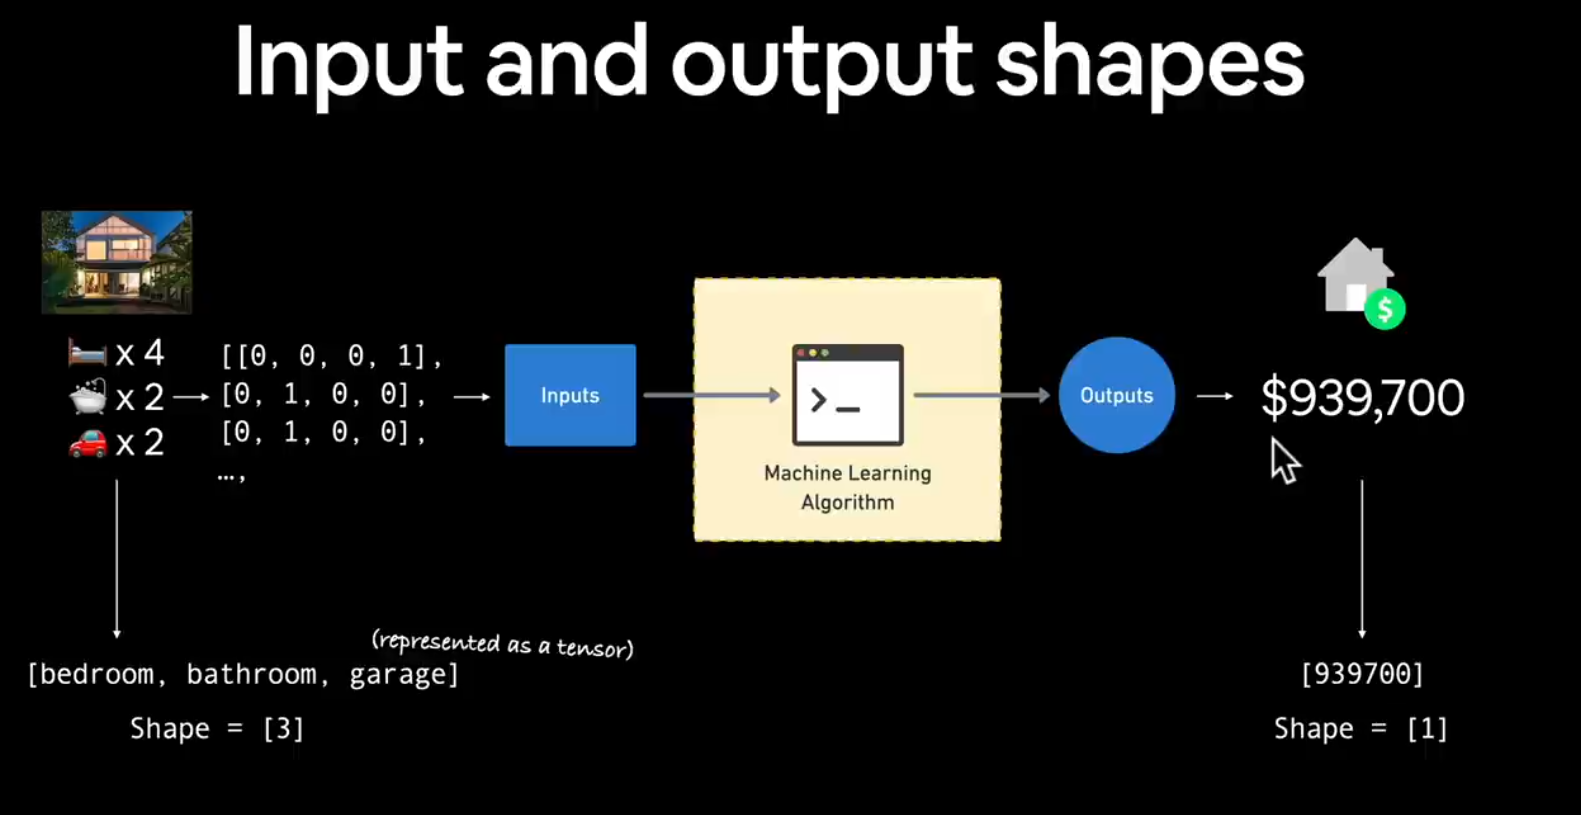

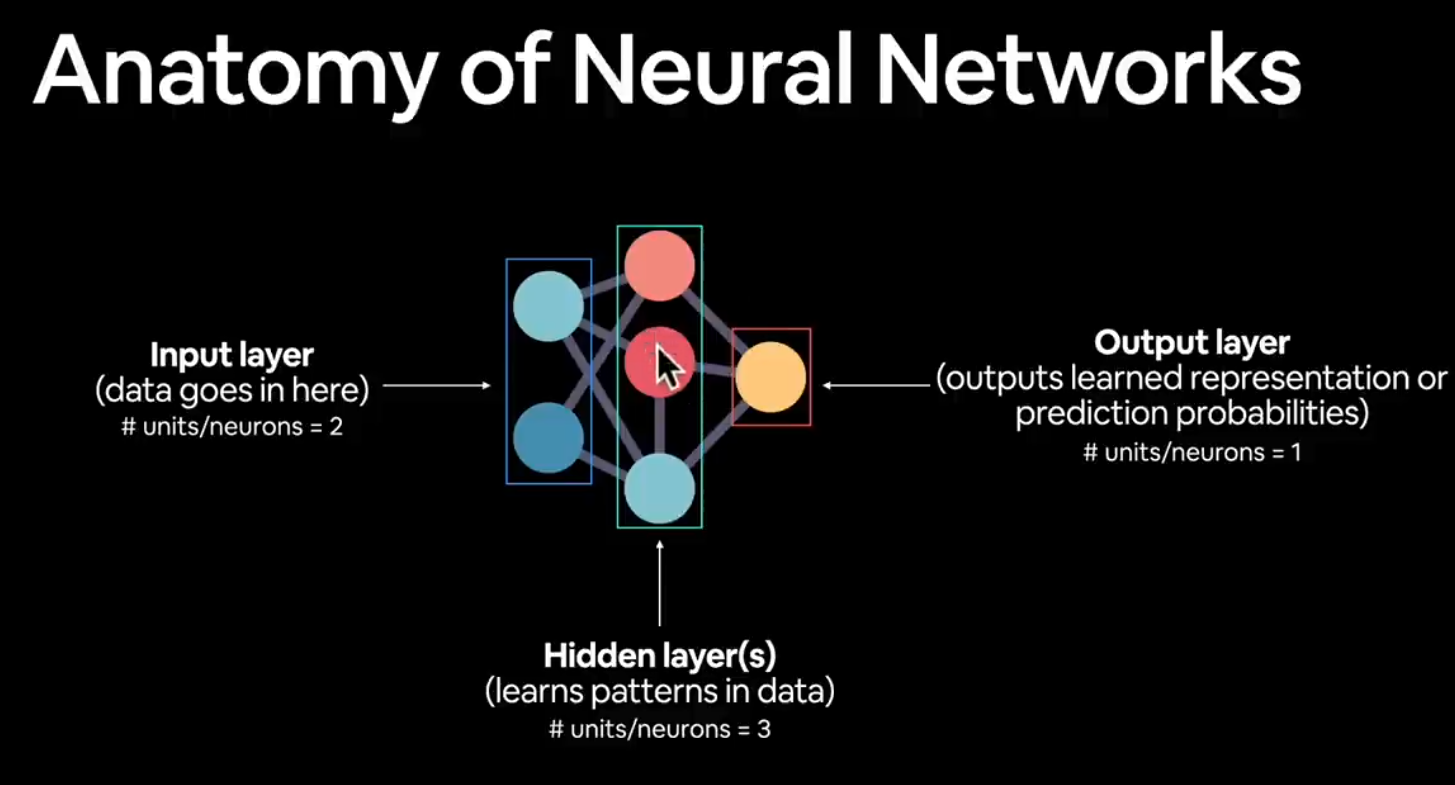

So there is :
1.   An input layer.
2.   Hidden layer(s).this is were our NN learns patterns and weights.
3.   Output layer.

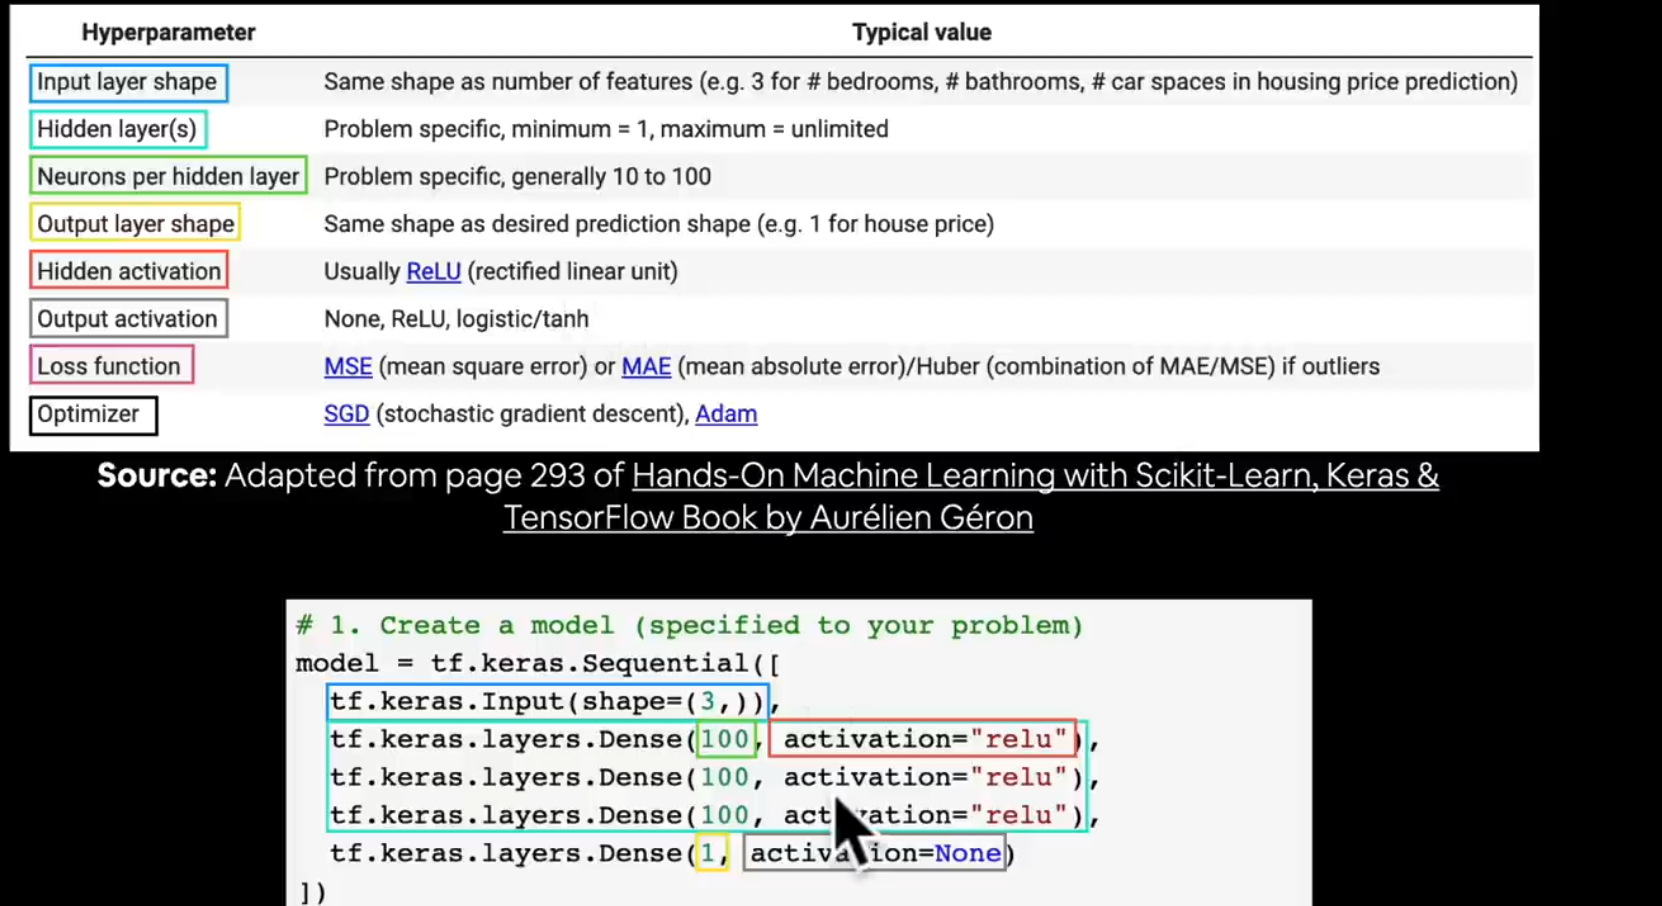

1. Create a model:

  1 x input layer

  n x Hidden layers (each hidden layer has y neurons and the activation function used here is 'relu')

  1 x output layer (1 neuron without an activation function)

2. Compile the model:

  Loss function: This measures how incorrect the predictions of the neural network are during the learning process of the relationship between the features and labels.

  Optimizer: In our case, we use the SGD/Adam optimizer. It guides the neural network on how to improve the patterns to reduce the loss function.

3. Fit the model:

  This involves instructing the model to analyze a whole bunch of different examples in the training data for a total of 100 epochs (laps).





There are many definitions for a regression problem, but in our case, we're going to simplify it: predicting a numerical variable based on a combination of other variables, including predicting a number.

In [3]:
import tensorflow as tf
tf.__version__

'2.12.0'

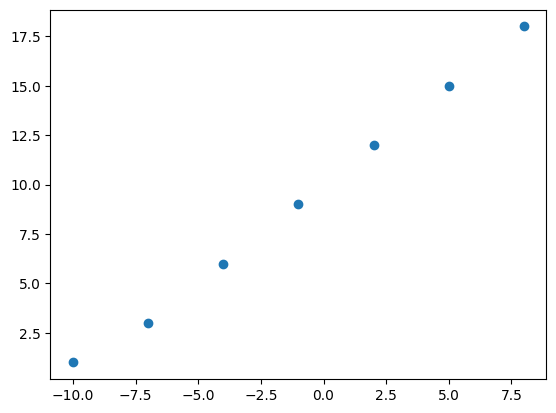

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features array :
X=np.array([-10.0,-7.0,-4.0,-1.0,2.0,5.0,8.0])
# Creating labels array :
y=np.array([1.0,3.0,6.0,9.0,12.0,15.0,18.0])
plt.scatter(X,y)

Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
X_house=np.array(["Bedrooms","Garage","Toilets"]);
y_house=np.array([999555]);
X_house.shape,y_house.shape # So there is 3 features and 1 label

((3,), (1,))

Steps in modelling with TensorFlow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our
model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).


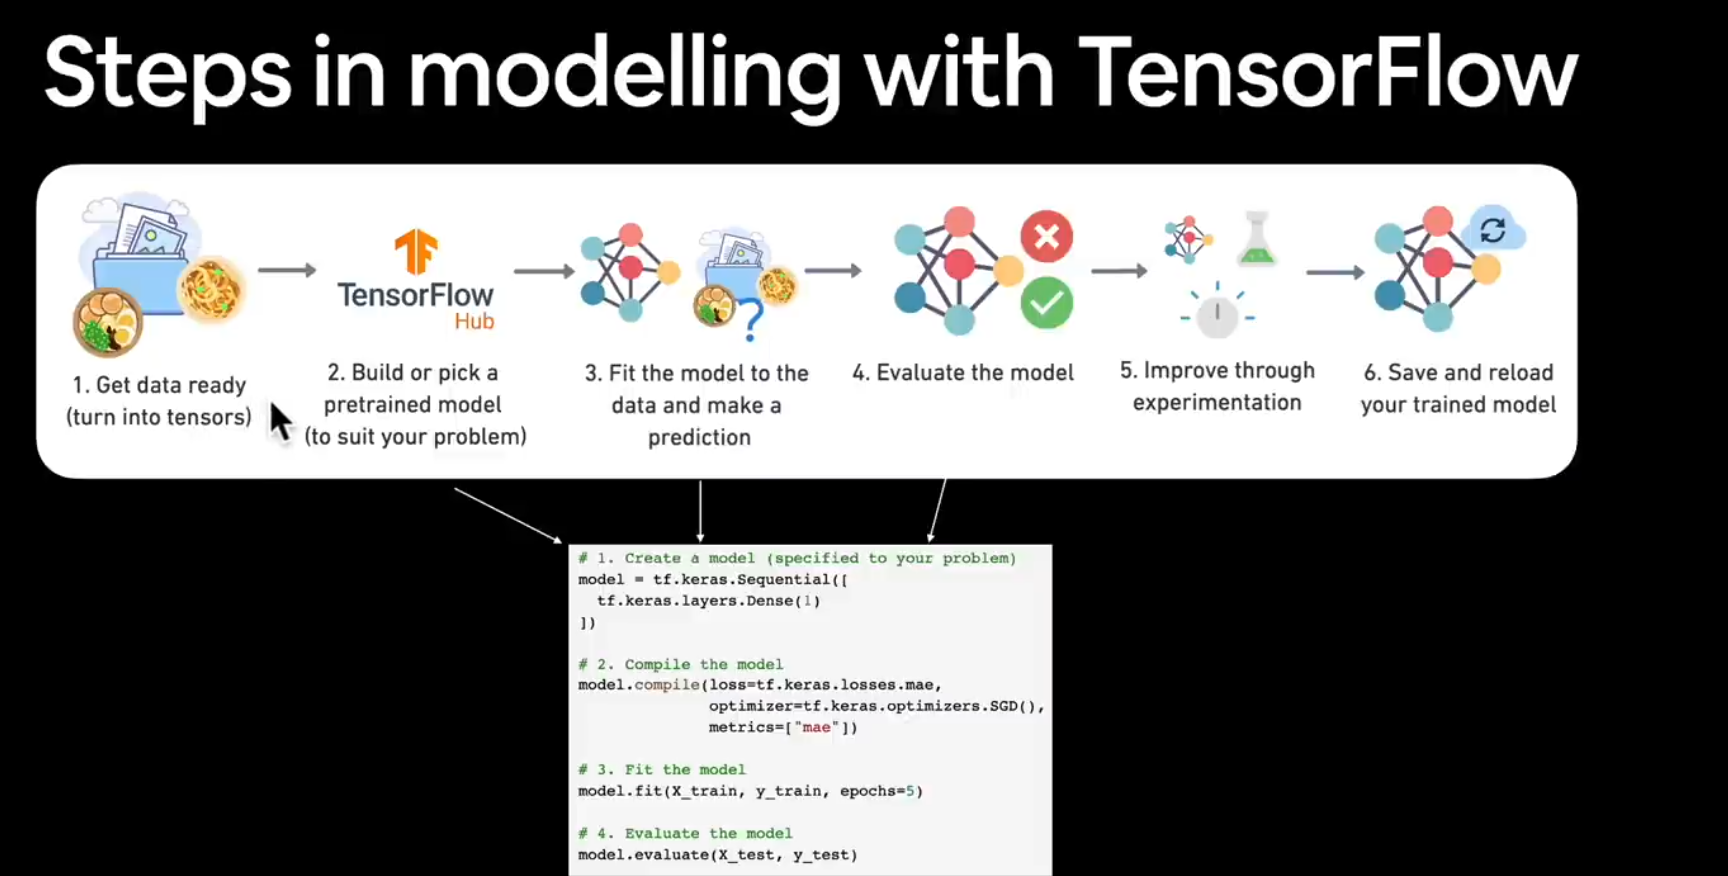

# Sequential vs functional APIS:

The Sequential API and the Functional API are two different ways to define and build models in Keras, a high-level deep learning library. Each API has its own advantages and use cases.

1/ Sequential API:

  The Sequential API is a straightforward and simple way to build sequential models, **where each layer in the model has exactly one input tensor and one output tensor** .

   You can create a Sequential model by initializing an instance of the Sequential class and then adding layers to it one by one. It is best suited for models that have a linear stack of layers, such as feedforward neural networks or simple convolutional neural networks.

  **Advantages of the Sequential API:**

  Easy to use and understand, especially for beginners.
  Straightforward construction of models with a single input and output path.
  Useful for building simple, sequential models without complex architectures.

  **Limitations of the Sequential API:**

  Cannot handle models with multiple inputs or outputs.
  Cannot handle models with shared layers or multiple branches.

2/ Functional API:

  The Functional API is a more flexible and powerful way to build models in Keras.
  It **allows you to define models with complex architectures, including models with multiple inputs and outputs, shared layers, and branched architectures**.
  Instead of defining models as a linear stack of layers, you explicitly define the connections between layers by creating instances of the Input class and connecting them using functional operations.

  **Advantages of the Functional API:**

  Supports models with multiple inputs and outputs.
  Allows for the creation of complex architectures, such as models with shared layers or multiple branches.
  Provides more flexibility in designing and manipulating the connections between layers.

  **Limitations of the Functional API:**

  Slightly more complex to use compared to the Sequential API.
  Requires a good understanding of the underlying concepts of tensors and functional operations.
  May not be necessary for simple models with a linear stack of layers.


In summary, the Sequential API is suitable for simple, sequential models, while the Functional API is more flexible and appropriate for complex models with multiple inputs/outputs or intricate architectures. The choice between the two APIs depends on the specific requirements of your model and the level of complexity you need to handle.

In [6]:
# Convert our numpy array into tensors :
X=tf.cast(tf.constant(X),tf.float32);
y=tf.cast(tf.constant(y),tf.float32);
X,y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-10.,  -7.,  -4.,  -1.,   2.,   5.,   8.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  3.,  6.,  9., 12., 15., 18.], dtype=float32)>)

In [7]:
from keras.api._v2.keras import Model
# Create the model
model=tf.keras.Sequential(tf.keras.layers.Dense(1))


In [8]:
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mae);

In [9]:
# Reshape the input data
X = np.reshape(X, (X.shape[0], 1))

# Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 10.5273 - mean_absolute_error: 10.5273
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 10.5073 - mean_absolute_error: 10.5073
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 10.4873 - mean_absolute_error: 10.4873
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.4473 - mean_absolute_error: 10.4473


In [10]:
X,y


(array([[-10.],
        [ -7.],
        [ -4.],
        [ -1.],
        [  2.],
        [  5.],
        [  8.]], dtype=float32),
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  3.,  6.,  9., 12., 15., 18.], dtype=float32)>)

In [11]:
# Try and make a prediction using our model
y_pred=model.predict([11.0])

1/1 [==============================] - 0s 136ms/step


In [12]:
y_pred+9.3 # too far from the expected result y_test=21

array([[24.029182]], dtype=float32)



> Bloc en retrait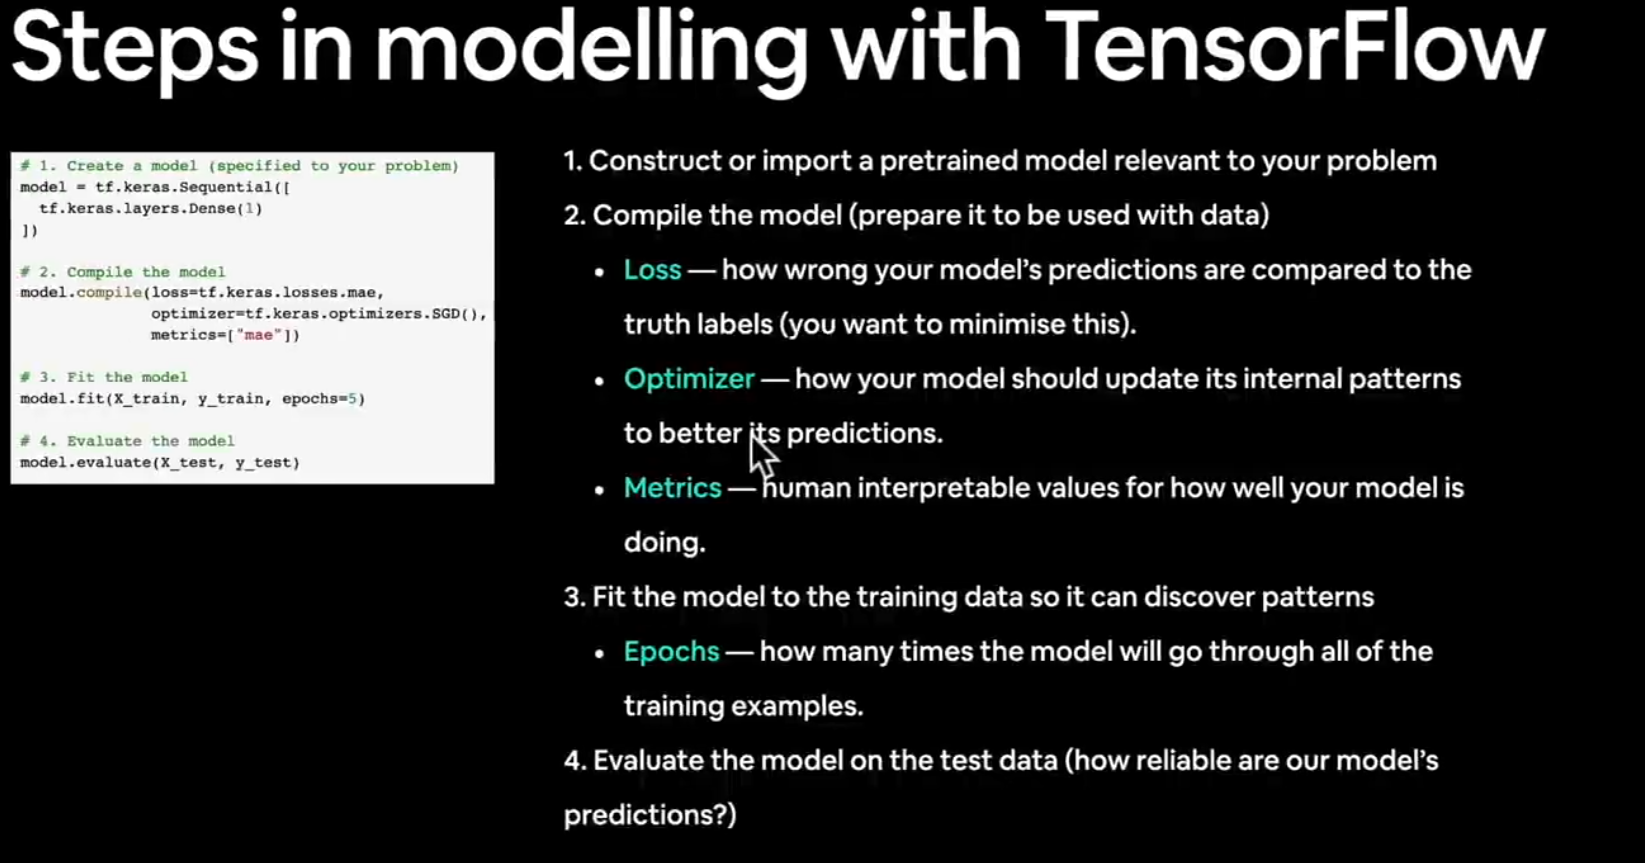



## Improving our model
We can improve our model, by altering the steps we took to
create a model.
1. * *Creating a model* * — here we might add more layers,
increase the number of hidden units (all called neurons )
within each of the hideen layers, change the activation
function of each layer.

2. * *Compiling a model* * — here we might change the
optimization function or perhaps the ** learning rate* * of the
optimization function.

3. * *Fitting a model ** — here we might fit a model for more **epochs** (leave it training for longer) or on more data
(give the model more examples to learn from)

In [13]:
X,y

(array([[-10.],
        [ -7.],
        [ -4.],
        [ -1.],
        [  2.],
        [  5.],
        [  8.]], dtype=float32),
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 1.,  3.,  6.,  9., 12., 15., 18.], dtype=float32)>)

In [14]:
# create the model
model2=tf.keras.Sequential([
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(1)
]);
# compile the model
model2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics="mae");
# Fit  the model
model2.fit(X,y,epochs=200, verbose=0)


In [15]:
# predict Value
model2.predict([11.0])

1/1 [==============================] - 0s 181ms/step


array([[19.565079]], dtype=float32)

###Common ways to improve a deep model:(changing heyparameters)
• Adding layers

• Increase the number of hidden units

• Change the activation functions

• Change the optimization function

• Change the learning rate

• Fitting on more data

• Fitting for longer


## Evaluting a model ("Visualize, visualize, visualize")
In practice, a typical workflow  when building neural networks is:
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it  -> ....

It's a good idea to visualize:

 • The data - what data are we working with? What does it look like?

 • The model itself - what does our model look like?

 • The training of a moc : - how does a model perform while it learns?

 • The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?


In [16]:
# Get a bigger dataSet
tf.random.set_seed(77)
X=tf.range(-100,100,dtype=tf.float32)
X

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([-100.,  -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,  -92.,
        -91.,  -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,  -83.,
        -82.,  -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,  -74.,
        -73.,  -72.,  -71.,  -70.,  -69.,  -68.,  -67.,  -66.,  -65.,
        -64.,  -63.,  -62.,  -61.,  -60.,  -59.,  -58.,  -57.,  -56.,
        -55.,  -54.,  -53.,  -52.,  -51.,  -50.,  -49.,  -48.,  -47.,
        -46.,  -45.,  -44.,  -43.,  -42.,  -41.,  -40.,  -39.,  -38.,
        -37.,  -36.,  -35.,  -34.,  -33.,  -32.,  -31.,  -30.,  -29.,
        -28.,  -27.,  -26.,  -25.,  -24.,  -23.,  -22.,  -21.,  -20.,
        -19.,  -18.,  -17.,  -16.,  -15.,  -14.,  -13.,  -12.,  -11.,
        -10.,   -9.,   -8.,   -7.,   -6.,   -5.,   -4.,   -3.,   -2.,
         -1.,    0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,
          8.,    9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,
         17.,   18.,   19.,   20.,   21., 

In [17]:
y=X+10
y

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80.,
       -79., -78., -77., -76., -75., -74., -73., -72., -71., -70., -69.,
       -68., -67., -66., -65., -64., -63., -62., -61., -60., -59., -58.,
       -57., -56., -55., -54., -53., -52., -51., -50., -49., -48., -47.,
       -46., -45., -44., -43., -42., -41., -40., -39., -38., -37., -36.,
       -35., -34., -33., -32., -31., -30., -29., -28., -27., -26., -25.,
       -24., -23., -22., -21., -20., -19., -18., -17., -16., -15., -14.,
       -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
        -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
         9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
        20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
   

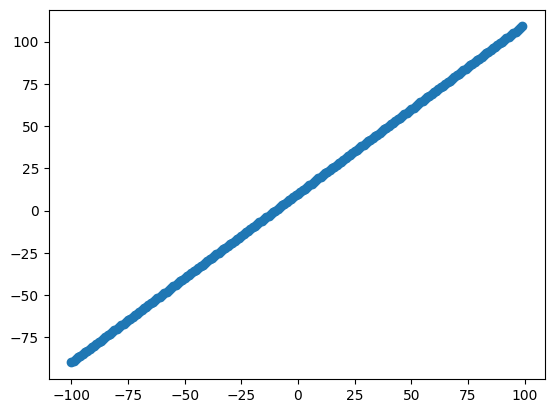

In [18]:
plt.scatter(X,y)

In [19]:
# Split out Data into Train& test datasets:
X_train=X[:160];
X_test=X[160:];
y_train=y[:160];
y_test=y[160:];


In [20]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(TensorShape([160]), TensorShape([160]), TensorShape([40]), TensorShape([40]))

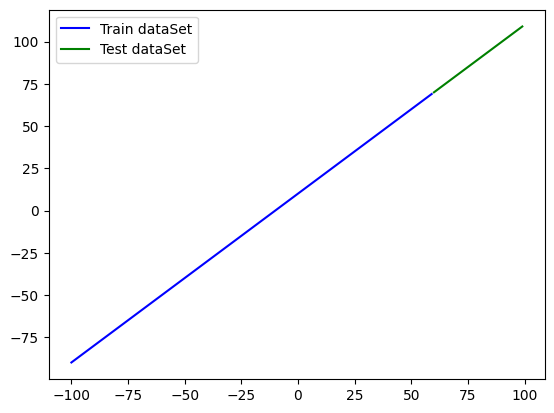

In [21]:
plt.figure()
plt.plot(X_train,y_train,c='b',label='Train dataSet')
plt.plot(X_test,y_test,c='g',label='Test dataSet')
plt.legend()


In [22]:
from os import name
# Build NN :
  # Create the model:
model=tf.keras.Sequential([
        tf.keras.layers.Dense(5,activation='relu',input_shape=[1],name='alpha'),
        tf.keras.layers.Dense(1,name='beta')
       ],name='gamma_model')
  # compile the model:
model.compile(loss='huber',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mse)

  # Fit it to the data:
model.fit(X_train,y_train,epochs=200,verbose=1)# verbose=0 no fiting trace

Epoch 1/200
5/5 [==============================] - 1s 10ms/step - loss: 27.1517 - mean_squared_error: 1194.0125
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 22.8086 - mean_squared_error: 906.4736
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 22.5723 - mean_squared_error: 801.0009
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 20.9462 - mean_squared_error: 726.9963
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 16.0096 - mean_squared_error: 367.6876
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 10.1591 - mean_squared_error: 241.3610
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 9.6666 - mean_squared_error: 194.2907
Epoch 8/200
5/5 [==============================] - 0s 6ms/step - loss: 10.1516 - mean_squared_error: 195.3046
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 7.5529 - mean_squared_error: 123.6087
Epoch 10/2

In [23]:
model.summary()

Model: "gamma_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 alpha (Dense)               (None, 5)                 10        
                                                                 
 beta (Dense)                (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


• Total params - total number of parameters in the model.

• Trainable parameters these are the parameters (patterns) the model can update as it trains.

• Non-trainable params - these parameters aren't updated during training (this is typical when you parameters from other models during transfer learning).



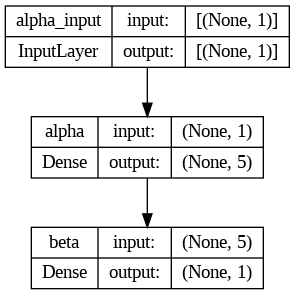

In [24]:
# Visualize our model
tf.keras.utils.plot_model(model=model,show_shapes='true')

Well through this visualization we can see that this model containts :

* An input layer with an input of 1

*   One hiden layer with an input of 1 and an output of 5 (the number of Unit / Neurone on that layer)

* An output layer with an input of 5 and an output of 1.


###Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you 'll see this in the form of y_ tests or y_true versus y_pred (ground truth versus your model 's predictions)

In [25]:
# Make Some predictions.
y_pred=model.predict(y_test)
y_pred

2/2 [==============================] - 0s 8ms/step


array([[ 73.77083 ],
       [ 74.77372 ],
       [ 75.77661 ],
       [ 76.77951 ],
       [ 77.7824  ],
       [ 78.78531 ],
       [ 79.78819 ],
       [ 80.791084],
       [ 81.79398 ],
       [ 82.796875],
       [ 83.79977 ],
       [ 84.802666],
       [ 85.805565],
       [ 86.808464],
       [ 87.811356],
       [ 88.81424 ],
       [ 89.81714 ],
       [ 90.82003 ],
       [ 91.82293 ],
       [ 92.82583 ],
       [ 93.82872 ],
       [ 94.83162 ],
       [ 95.8345  ],
       [ 96.837395],
       [ 97.8403  ],
       [ 98.84319 ],
       [ 99.846085],
       [100.84898 ],
       [101.851875],
       [102.854774],
       [103.85767 ],
       [104.86056 ],
       [105.86346 ],
       [106.86635 ],
       [107.86924 ],
       [108.87214 ],
       [109.87504 ],
       [110.87794 ],
       [111.88082 ],
       [112.88371 ]], dtype=float32)

In [26]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction_labels=y_pred):
  plt.figure(figsize=(10,7));
  plt.scatter(train_data,train_labels,c='b',label='Train dataSet');
  plt.scatter(test_data,test_labels,c='g',label='Test dataSet');
  plt.scatter(test_data,prediction_labels,c='r',label='Predictions ');
  plt.legend();

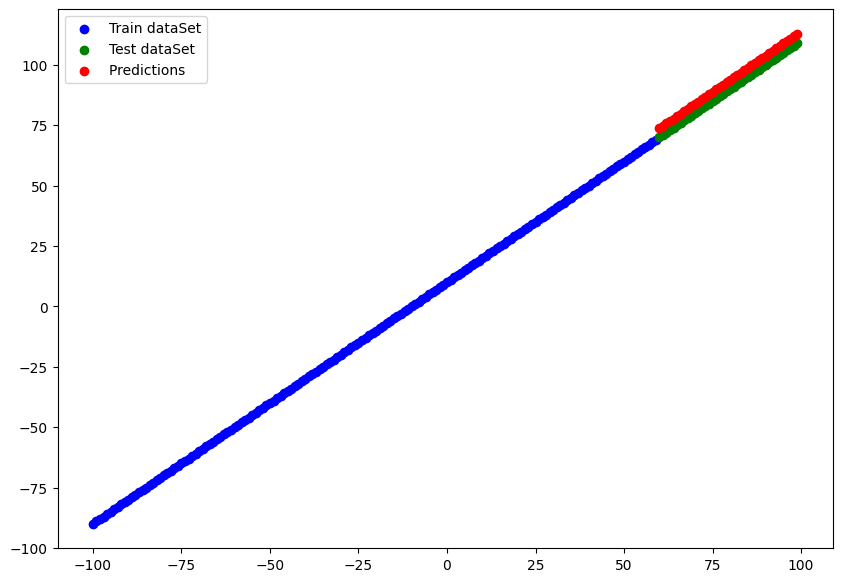

In [27]:
plot_predictions()

Evaluating our model's predictions with regression evaluation metrics depends on the problem you are working on. There will be different evaluation metrics to assess your model's performance. Since we are dealing with a regression problem, two main metrics to consider are:


* MAE (Mean Absolute Error) - This metric measures, on average, how wrong each of my model's predictions is.

* MSE (Mean Square Error) - This metric squares the average errors to provide a measure of overall prediction accuracy.

In [28]:
# Calculate MAE
tf.keras.metrics.mean_absolute_error(y_test,y_pred) # Strange why am getting a matrix, it supposed to be a scalar.

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([16.183338 , 15.41971  , 14.706372 , 14.043318 , 13.430559 ,
       12.86808  , 12.355904 , 11.894012 , 11.482407 , 11.121094 ,
       10.81007  , 10.549334 , 10.338887 , 10.178731 , 10.068865 ,
       10.009288 , 10.       , 10.041002 , 10.132293 , 10.273874 ,
       10.465744 , 10.707905 , 11.000351 , 11.343088 , 11.73612  ,
       12.179438 , 12.673042 , 13.21694  , 13.811125 , 14.455603 ,
       15.1503725, 15.895418 , 16.690765 , 17.536396 , 18.432316 ,
       19.378532 , 20.375038 , 21.377937 , 22.380821 , 23.383713 ],
      dtype=float32)>

In [29]:
# Let's examin y_pred and y_test shapes
y_pred.shape,y_test.shape # Well y_pred has an extra dimension , that' not cool.Let's reshape-it. Also y_pred isn't a tensor, it' an array.

((40, 1), TensorShape([40]))

In [30]:
# reshape + convert to tensor:
tf.constant(y_pred.squeeze())

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([ 73.77083 ,  74.77372 ,  75.77661 ,  76.77951 ,  77.7824  ,
        78.78531 ,  79.78819 ,  80.791084,  81.79398 ,  82.796875,
        83.79977 ,  84.802666,  85.805565,  86.808464,  87.811356,
        88.81424 ,  89.81714 ,  90.82003 ,  91.82293 ,  92.82583 ,
        93.82872 ,  94.83162 ,  95.8345  ,  96.837395,  97.8403  ,
        98.84319 ,  99.846085, 100.84898 , 101.851875, 102.854774,
       103.85767 , 104.86056 , 105.86346 , 106.86635 , 107.86924 ,
       108.87214 , 109.87504 , 110.87794 , 111.88082 , 112.88371 ],
      dtype=float32)>

In [31]:
tf.keras.metrics.mean_absolute_error(tf.constant(y_pred.squeeze()),y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=3.827272>

In [32]:
# Calculate MSE
tf.keras.metrics.mean_squared_error(y_test,tf.constant(y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float32, numpy=14.649126>

In [33]:
# Calculate Huber
tf.keras.losses.huber(y_test,tf.constant(y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float32, numpy=3.327272>

In [34]:
# Create a function to automate the calculation of the MAE metric."
def mae(y_testn=y_test,y_pred=y_pred) :
      return tf.keras.metrics.mean_absolute_error(y_test,tf.constant(y_pred.squeeze()));

In [35]:
# Create a function to automate the calculation of the MSE metric."
def mse(y_test=y_test,y_pred=y_pred) :
      return tf.keras.metrics.mean_squared_error(y_test,tf.constant(y_pred.squeeze()));

### Running experiments to improve our model
Build a model -> fit it -> evaluate it -> tweak it ...

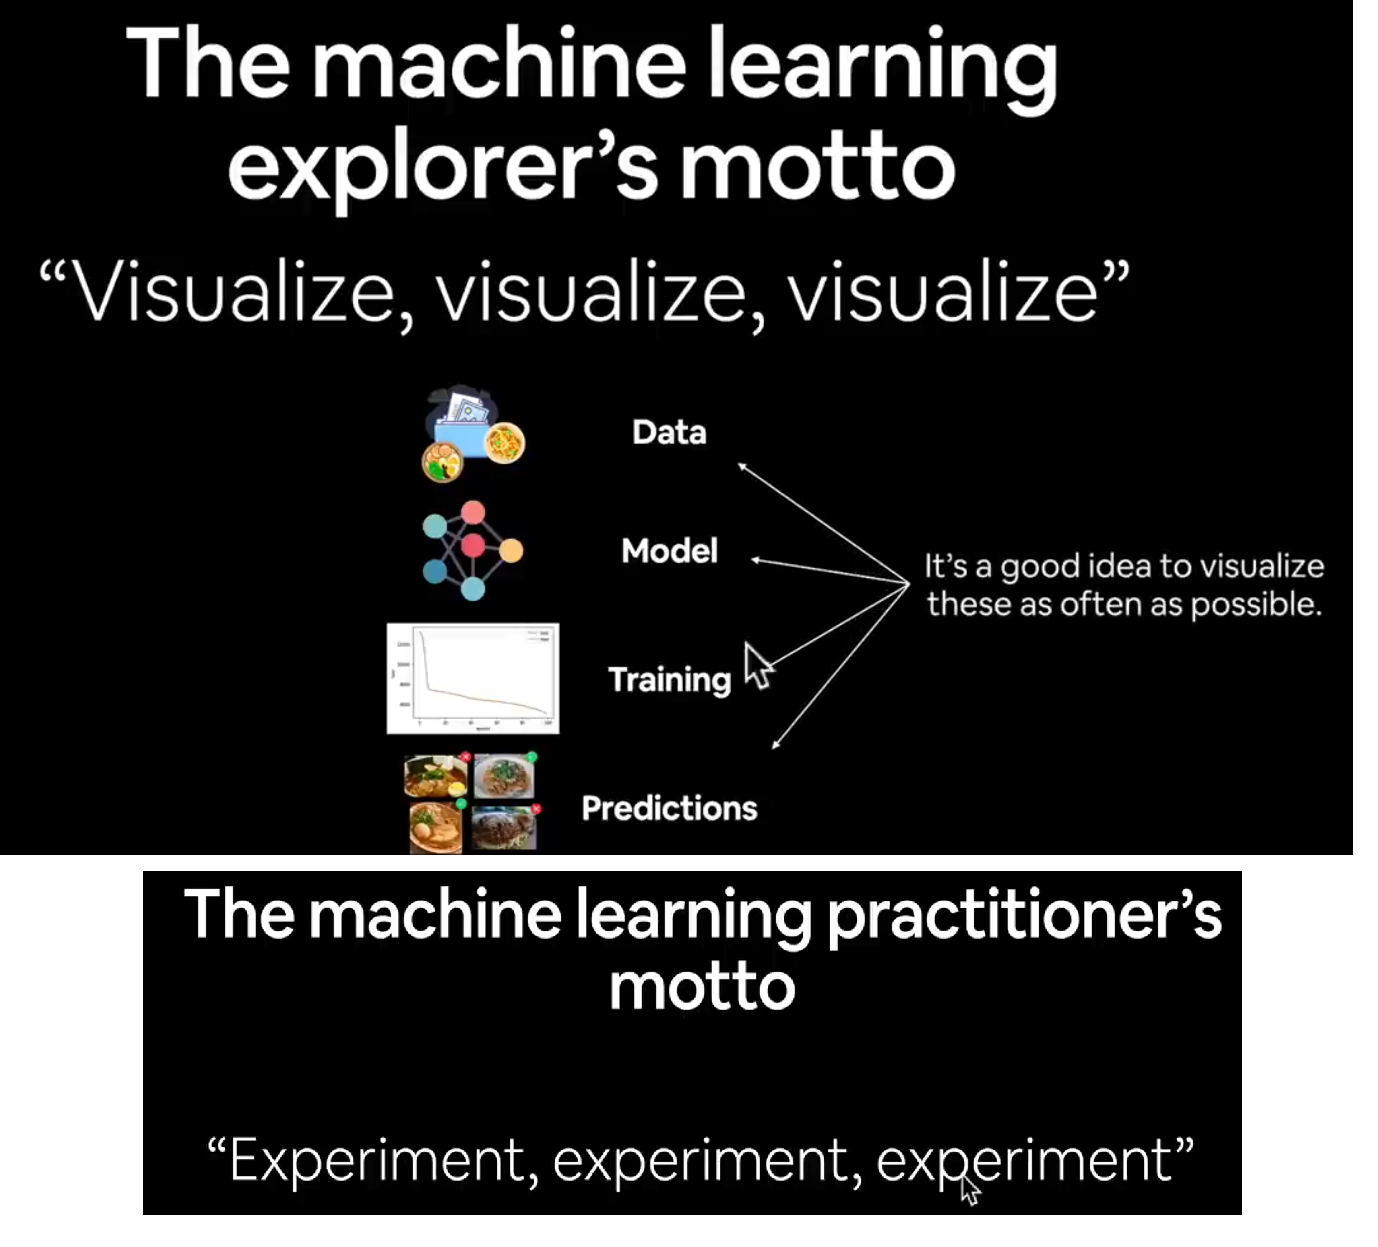

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and
labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. model _ 1 - same as the original model, 1 layer, trained for 100 epochs
2. model _ 2 -2 layers, trained for 100 epochs
3. model _ 3 -2 layers, trained for 500 epochs

In [36]:
X_train,y_train

(<tf.Tensor: shape=(160,), dtype=float32, numpy=
 array([-100.,  -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,  -92.,
         -91.,  -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,  -83.,
         -82.,  -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,  -74.,
         -73.,  -72.,  -71.,  -70.,  -69.,  -68.,  -67.,  -66.,  -65.,
         -64.,  -63.,  -62.,  -61.,  -60.,  -59.,  -58.,  -57.,  -56.,
         -55.,  -54.,  -53.,  -52.,  -51.,  -50.,  -49.,  -48.,  -47.,
         -46.,  -45.,  -44.,  -43.,  -42.,  -41.,  -40.,  -39.,  -38.,
         -37.,  -36.,  -35.,  -34.,  -33.,  -32.,  -31.,  -30.,  -29.,
         -28.,  -27.,  -26.,  -25.,  -24.,  -23.,  -22.,  -21.,  -20.,
         -19.,  -18.,  -17.,  -16.,  -15.,  -14.,  -13.,  -12.,  -11.,
         -10.,   -9.,   -8.,   -7.,   -6.,   -5.,   -4.,   -3.,   -2.,
          -1.,    0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,
           8.,    9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,
          17.,   18.,   19.,

In [37]:
### create model1
# Create model :
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',input_shape=[1],name='my_first_layer'),
    tf.keras.layers.Dense(1,activation='relu',name='my_second_layer')
  ],name='model1')
# Compile model :
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01) ,loss=tf.keras.losses.mae,metrics='mae')
# Fit the model :
model1.fit(X_train,y_train,epochs=100,verbose=0)

In [38]:
# Create model 2
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',input_shape=[1],name='my_first_layer'),
    tf.keras.layers.Dense(100,activation='relu',name='mw_second_layer'),
    tf.keras.layers.Dense(1)
],name='model2')
# Compile the model
model2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
model2.fit(X_train,y_train,epochs=100,verbose=0)


In [39]:
# Create the model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',input_shape=[1],name="first_layer"),
    tf.keras.layers.Dense(100,activation='relu',name="second_layer"),
    tf.keras.layers.Dense(1)
    ],name='model3')
# Compile the model3
model3.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
# Fit the model3
model3.fit(X_train,y_train,epochs=500,verbose=0)

In [40]:
# Predect values :
model1_y_pred=model1.predict(y_test)
model2_y_pred=model2.predict(y_test)
model3_y_pred=model3.predict(y_test)


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 5ms/step


# Visualize,Visualize,Visualize 🧑....

In [41]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 100)               200       
                                                                 
 my_second_layer (Dense)     (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [42]:
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 100)               200       
                                                                 
 mw_second_layer (Dense)     (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [43]:
model3.summary()

Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 100)               200       
                                                                 
 second_layer (Dense)        (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


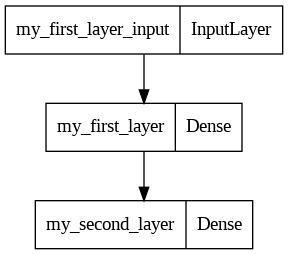

In [44]:
from keras.utils import vis_utils
vis_utils.plot_model(model1)

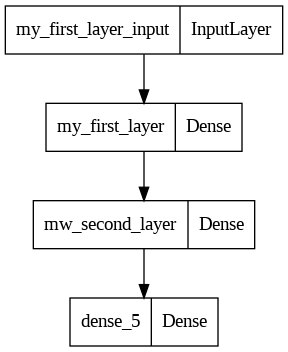

In [45]:
vis_utils.plot_model(model2)

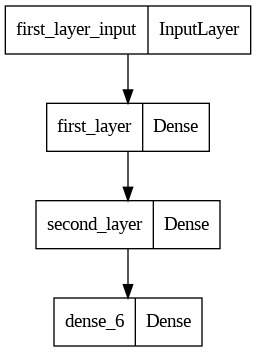

In [46]:
vis_utils.plot_model(model3)

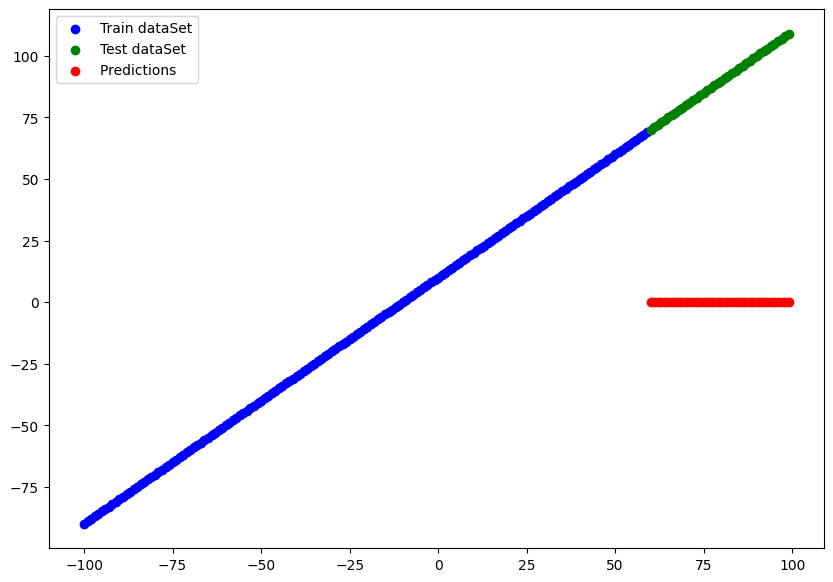

In [47]:
#plot prediction of model 1
plot_predictions(X_train,y_train,X_test,y_test,model1_y_pred)

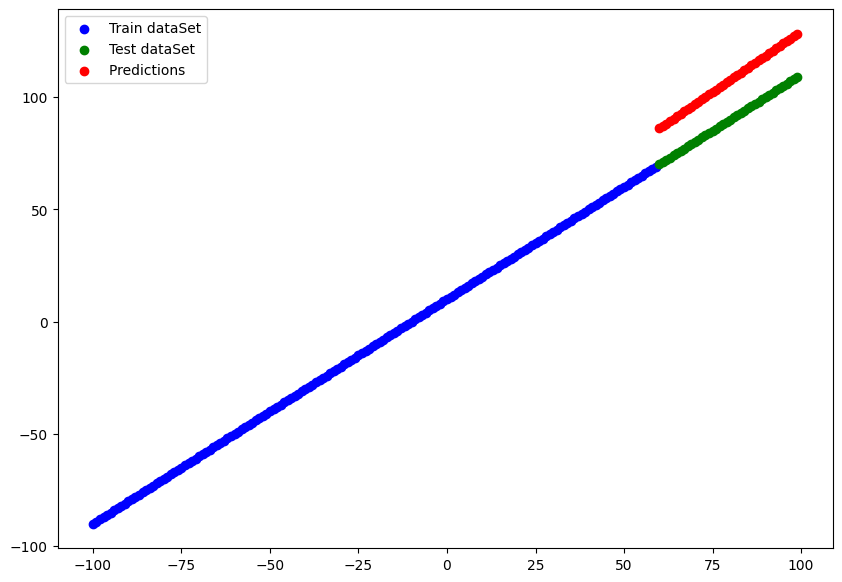

In [48]:
# plot prediction for model2 :
plot_predictions(X_train,y_train,X_test,y_test,model2_y_pred)

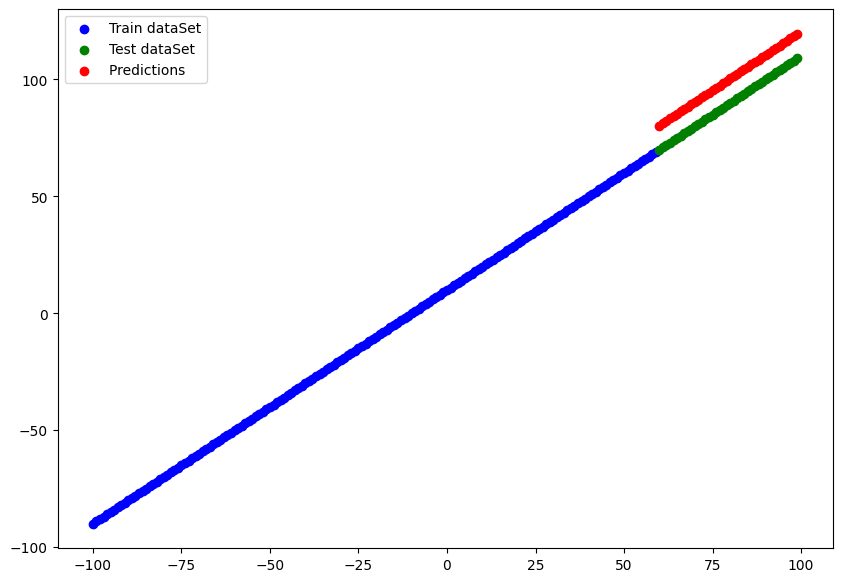

In [49]:
# plot predictions for model3
plot_predictions(X_train,y_train,X_test,y_test,model3_y_pred)

In [50]:
# Calculate MAE for model1
mae_1=mae(y_test,model1_y_pred).numpy()
mae_1
# each model1_y_pred point is 89.5 away from where it should be.

89.5

In [51]:
# Calculate MAE for model2
mae_2=mae(y_test,model2_y_pred).numpy()
mae_2
# each model2_y_pred point is 2.19 away from where it should be.

17.606077

In [52]:
# Calculate MAE for model3
mae_3=mae(y_test,model3_y_pred).numpy()
mae_3
# each model1_y_pred point is 12.56 away from where it should be.

10.424126

In [53]:
# Calculate MSE for model 1
mse_1=mse(y_test,model1_y_pred).numpy()
mse_1

8143.5

In [54]:
# Calculate MSE for model 2
mse_2=mse(y_test,model2_y_pred).numpy()
mse_2


310.83902

In [55]:
# Calculate MSE for model 3
mse_3=mse(y_test,model3_y_pred).numpy()
mse_3

108.66746

### Comparing the results of our experiments (Here it comes: Pandas! Another library that I've wanted to master. I'd say this course is pretty interesting! Thank you, Daniel.)
We've run a few experiments, let's compare the results.

In [56]:
# Comparing models :
model_result=[['model1',mae_1,mse_1],['model2',mae_2,mse_2],['model3',mae_3,mse_3]]

import pandas as pd
frame=pd.DataFrame(model_result,columns=["model_name","MAE",'MSE'])
frame

,model_name,MAE,MSE
0,model1,89.500000,8143.500000
1,model2,17.606077,310.839020
2,model3,10.424126,108.667458


Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the
more things you'll figure out which dont work and in turn, get closer to figuring out what does work. Remember the machine
learning practioner's motto: "experiment, experiment, experiment".

Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📑 Resource: As you build more models, you'll want to look into using:

• TensorBoard component of the TensorFlow library to help track modelling experiments (we'll see this one later).

• Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).


### Saving our models :
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModeI format

2. The HDF5 format


In [57]:
# Save model using the SavedModel format
model2.save('my_best_trained_model')

In [58]:
 model2.save('my_best_trained_model.h5')

In [59]:
# load a models
format_model_loaded_model_=tf.keras.models.load_model("/content/my_best_trained_model")
h5_loaded_model=tf.keras.models.load_model("/content/my_best_trained_model.h5")


In [60]:
loaded_model_preds =format_model_loaded_model_.predict(X_test)
def predict_with_model(model, input_data):
    predictions = model.predict(input_data)
    return predictions

2/2 [==============================] - 0s 4ms/step


In [61]:
from threading import local
from tensorflow.python import summary
import pdb

# Function that compare a loaded_model with an local_model
def compare_models(loaded_model=format_model_loaded_model_, local_model=model2, X_test=X_test):
  # Calculate prediction for each model
  loaded_model_preds =loaded_model.predict(X_test)
  local_model_preds = local_model.predict(X_test)
  # Check shape of predictions array dosent fit
  print("Verify that the shape of the predictions array fits:")
  assert loaded_model_preds.shape == local_model_preds.shape
  # compare loaded_model & local_model prediction
  # pdb.set_trace() // debugger
  assert np.array_equal(local_model_preds, local_model_preds), "Arrays are not the same."
  print("The loaded_model & local_model predictions are exactly the same.")


In [62]:
format_model_loaded_model_.predict(X_test).shape

2/2 [==============================] - 0s 5ms/step


(40, 1)

In [63]:
model2.predict(X_test).shape

2/2 [==============================] - 0s 5ms/step


(40, 1)

In [64]:
compare_models(format_model_loaded_model_,model2,X_test);

2/2 [==============================] - 0s 8ms/step
Verify that the shape of the predictions array fits:
The loaded_model & local_model predictions are exactly the same.


Download a model (or any other file) from Google Colab
If you want to download your files from Google Colab:
1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).


In [65]:
# Download a file from Google Colab
from google.colab import files
#files.download("/content/my_best_trained_model.h5")

In [66]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
#!cp /content/best model HDF5 format.h5/ content/drive/MyDrive

### A larger example

In [67]:
# Import dataset using pandas + show the first 10 rows.
dataSet=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataSet.head(10) # We could've used dataSet.tail(10) to show the ten last rows, ya know? .

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [68]:
# One hot encode our dataSet
one_hot_encoded_dataSet=pd.get_dummies(dataSet)
one_hot_encoded_dataSet.tail(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1328,23,24.225,2,22395.74424,1,0,1,0,1,0,0,0
1329,52,38.600,2,10325.20600,0,1,1,0,0,0,0,1
1330,57,25.740,2,12629.16560,1,0,1,0,0,0,1,0
1331,23,33.400,0,10795.93733,1,0,1,0,0,0,0,1
1332,52,44.700,3,11411.68500,1,0,1,0,0,0,0,1
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1
1337,61,29.070,0,29141.36030,1,0,0,1,0,1,0,0


In [69]:
# Create X & y values (features and labels)
labels=tf.constant(one_hot_encoded_dataSet['charges'])
features = tf.constant(one_hot_encoded_dataSet.drop('charges', axis=1))
# Create training and test sets
insurance_X_train=tf.squeeze(features[:1000])
insurance_y_train=tf.squeeze(labels[:1000])
insurance_X_test=tf.squeeze(features[1000:])
insurance_y_test=tf.squeeze(labels[1000:])
insurance_y_test.shape


TensorShape([338])

In [70]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
# Build a neural network (sort of like model 2 above)
insurance_model_01= tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])
insurance_model_01.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics="mae")
insurance_model_history=insurance_model_01.fit(insurance_X_train,insurance_y_train,epochs=1000, callbacks=[callback],verbose=0)

In [71]:
insurance_model_01_pred=insurance_model_01.predict(insurance_X_test)


11/11 [==============================] - 0s 2ms/step


In [72]:
# Evaluate our model
insurance_model_01.evaluate(insurance_X_test,insurance_y_test)

11/11 [==============================] - 0s 3ms/step - loss: 2899.4607 - mae: 2899.4607


[2899.460693359375, 2899.460693359375]

In [73]:
squeezed_preds=insurance_model_01_pred

In [74]:
tf.keras.metrics.mean_absolute_error(insurance_y_test,tf.constant(insurance_model_01_pred.squeeze())).numpy()


2899.461

In [75]:
print(insurance_y_test.shape)
print(tf.squeeze(tf.constant(insurance_model_01_pred)).shape)

(338,)
(338,)


<Axes: >

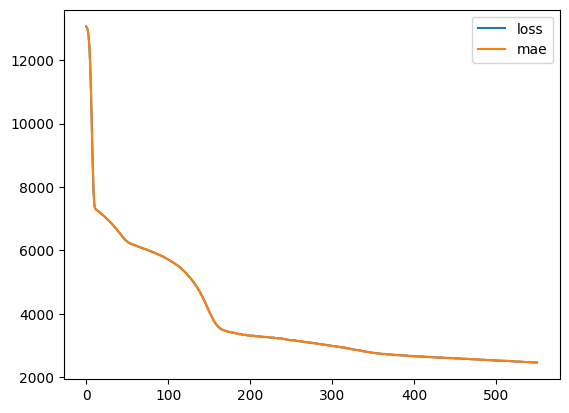

In [76]:
pd.DataFrame(insurance_model_history.history).plot()

Question: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution!
Itis called the which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

This is performed using :
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)


In [77]:
insurance_X_train

<tf.Tensor: shape=(1000, 11), dtype=float64, numpy=
array([[19.   , 27.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [18.   , 33.77 ,  1.   , ...,  0.   ,  1.   ,  0.   ],
       [28.   , 33.   ,  3.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [63.   , 36.85 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [33.   , 36.29 ,  3.   , ...,  0.   ,  0.   ,  0.   ],
       [36.   , 26.885,  0.   , ...,  1.   ,  0.   ,  0.   ]])>

In [78]:
X=one_hot_encoded_dataSet.drop('charges', axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

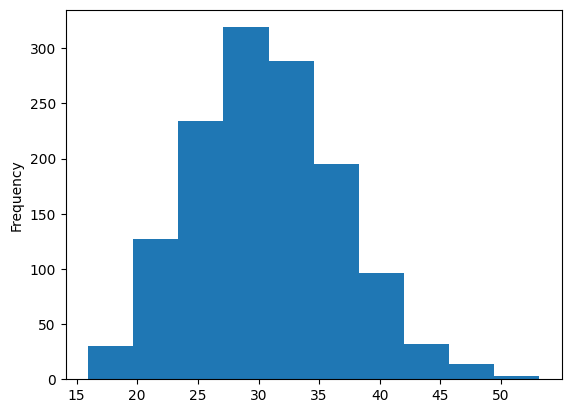

In [79]:
X['bmi'].plot(kind='hist')

<Axes: ylabel='Frequency'>

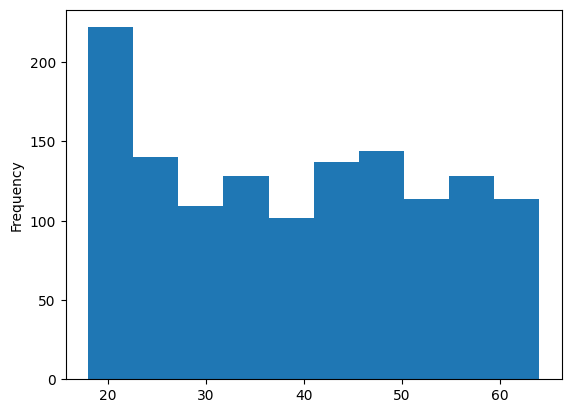

In [80]:
X['age'].plot(kind='hist')

### Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.
If you're not sure on which to use, you could try both and see which performs better.

📑https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [81]:
import pandas as pd
import matplotlib as plt
import tensorflow as tf
# read dataSet
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Next step :
1. Normalize numerical features.
2. Prepare the non numerical features.
3. Fit our NN.

In [82]:
import pandas as pd
import tensorflow as tf
import matplotlib as plt
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]),
   ( MinMaxScaler(),["bmi","age","children"])
)

In [84]:
X=insurance.drop("charges",axis =1)
X['age'] = X['age'].astype(float)
y=insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [85]:
# motto visualize ,visualize visualize !
X_train.head(4)

,age,sex,bmi,children,smoker,region
560,46.0,female,19.95,2,no,northwest
1285,47.0,female,24.32,0,no,northeast
1142,52.0,female,24.86,0,no,southeast
969,39.0,female,34.32,5,no,southeast


In [86]:
y_train.head(4)

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
Name: charges, dtype: float64

In [87]:
X_train.shape

(1070, 6)

In [88]:
y_train.shape


(1070,)

In [89]:
X_test.shape

(268, 6)

In [90]:
y_test.shape

(268,)

In [91]:
#fit the transformer to the data
ct=ct.fit(X_train)

In [92]:
X_train_normalized=ct.transform(X_train)
X_test_normalized=ct.transform(X_test)

In [93]:
X_train_normalized[0]

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.10734463, 0.60869565,
       0.4       ])

<Axes: ylabel='Frequency'>

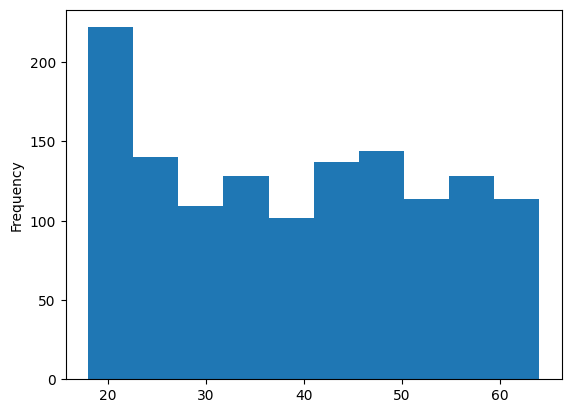

In [94]:
X['age'].plot(kind='hist')

In [95]:
X_train.loc[0]

age              19.0
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [96]:
X_train_normalized[0]


array([1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.10734463, 0.60869565,
       0.4       ])

In [97]:
X_train.shape , X_train_normalized.shape

((1070, 6), (1070, 11))

In [103]:
from keras.layers.serialization import activation
# Create the model
model10=tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation="relu",input_shape=[11]),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(7,activation=tf.keras.activations.relu)
])
# Compile the model :
model10.compile(loss=tf.keras.losses.mean_absolute_error,optimizer=tf.keras.optimizers.Adam(), metrics="mae")
# Fit the model
model10.fit(X_train_normalized ,y_train,epochs=100,verbose=0)

In [104]:
# Evaluate the model
model10.evaluate(X_test_normalized,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2847.0527 - mae: 2847.0527


[2847.052734375, 2847.052734375]